# **DA5401 A5 (Visualizing Data Veracity Challenges in Multi-Label Classification)**

### **Dependencies**

In [92]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

## **Part A: Preprocessing and Initial Setup**

### **Data Loading**

- **Yeast dataset**: Multi-label dataset with 14 target labels, available from the Mulan repository.
- Loaded using `fetch_openml` (data ID: 40597), which corresponds to the same dataset as the Mulan version.
- Features (`X`) and targets (`y`) are combined into a single DataFrame and saved as a CSV for further use.
- Dataset details: [OpenML Yeast Dataset (ID: 40597)](https://www.openml.org/search?exact_name=yeast&id=40597)

In [49]:
yeast_dataset = fetch_openml(data_id=40597, as_frame=True)

X = yeast_dataset.data
y = yeast_dataset.target

df = pd.concat([X, y], axis=1)

os.makedirs("datasets", exist_ok=True)

csv_path = "datasets/yeast.csv"
df.to_csv(csv_path, index=False)

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

Features (X) shape: (2417, 103)
Target (y) shape: (2417, 14)


### **Dimensionality Check**

- The Yeast dataset initially contains **2417 data points** and **103 features**.  
- The multi-label target matrix `Y` contains **14 labels**.  
- Performed basic exploration to understand the data:  
  - `X.shape`, `X.describe()`, `X.info()`, `X.head()` for features  
  - `y.shape`, `y.describe()`, `y.info()`, `y.head()` for target labels  

In [50]:
X.shape

(2417, 103)

In [51]:
X.describe()

Att1         Att2         Att3         Att4         Att5  \
count  2417.000000  2417.000000  2417.000000  2417.000000  2417.000000   
mean      0.001173    -0.000436    -0.000257     0.000265     0.001228   
std       0.097411     0.097885     0.097746     0.096969     0.096909   
min      -0.371146    -0.472632    -0.339195    -0.467945    -0.367044   
25%      -0.053655    -0.058734    -0.057526    -0.057149    -0.058461   
50%       0.003649    -0.003513     0.002892    -0.000153     0.005565   
75%       0.057299     0.048047     0.061007     0.054522     0.066286   
max       0.520272     0.614114     0.353241     0.568960     0.307649   

              Att6         Att7         Att8         Att9        Att10  ...  \
count  2417.000000  2417.000000  2417.000000  2417.000000  2417.000000  ...   
mean      0.000475     0.001107     0.000420     0.001076    -0.000009  ...   
std       0.097306     0.097170     0.096803     0.096326     0.096805  ...   
min      -0.509447    -0.319928    -0.594498    -0.369712    -0.767128  ...   
25%      -0.060212    -0.058445    -0.062849    -0.063472    -0.065010  ...   
50%       0.000321     0.006179     0.001436     0.003515     0.002432  ...   
75%       0.059908     0.068892     0.061418     0.064958     0.063096  ...   
max       0.336971     0.351401     0.454591     0.419852     0.420876  ...   

             Att94        Att95        Att96        Att97        Att98  \
count  2417.000000  2417.000000  2417.000000  2417.000000  2417.000000   
mean     -0.000773     0.000464    -0.000515     0.000667     0.000324   
std       0.093316     0.096684     0.096209     0.096635     0.096280   
min      -0.455191    -0.283594    -0.279408    -0.226420    -0.225374   
25%      -0.054133    -0.056415    -0.056414    -0.059382    -0.058025   
50%      -0.012893    -0.023595    -0.024313    -0.023059    -0.021942   
75%       0.027977     0.034937     0.036057     0.041430     0.035730   
max       0.609175     0.542867     0.547134     0.385928     0.540493   

             Att99       Att100       Att101       Att102       Att103  
count  2417.000000  2417.000000  2417.000000  2417.000000  2417.000000  
mean     -0.001483    -0.001047    -0.001539     0.000284     0.007605  
std       0.094369     0.096900     0.094211     0.093154     0.099368  
min      -0.501572    -0.236589    -0.267052    -0.194079    -0.237752  
25%      -0.053591    -0.063318    -0.059542    -0.054078    -0.077191  
50%      -0.018216    -0.033623    -0.023519    -0.012007     0.022126  
75%       0.019583     0.038901     0.025408     0.028087     0.103185  
max       0.569250     0.509963     0.587358     0.700340     0.163431  

[8 rows x 103 columns]

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Columns: 103 entries, Att1 to Att103
dtypes: float64(103)
memory usage: 1.9 MB


In [53]:
X.head()

Att1      Att2      Att3      Att4      Att5      Att6      Att7  \
0  0.004168 -0.170975 -0.156748 -0.142151  0.058781  0.026851  0.197719   
1 -0.103956  0.011879 -0.098986 -0.054501 -0.007970  0.049113 -0.030580   
2  0.509949  0.401709  0.293799  0.087714  0.011686 -0.006411 -0.006255   
3  0.119092  0.004412 -0.002262  0.072254  0.044512 -0.051467  0.074686   
4  0.042037  0.007054 -0.069483  0.081015 -0.048207  0.089446 -0.004947   

       Att8      Att9     Att10  ...     Att94     Att95     Att96     Att97  \
0  0.041850  0.066938 -0.056617  ...  0.006166 -0.012976 -0.014259 -0.015024   
1 -0.077933 -0.080529 -0.016267  ...  0.007680  0.027719 -0.085811  0.111123   
2  0.013646 -0.040666 -0.024447  ...  0.096277 -0.044932 -0.089470 -0.009162   
3 -0.007670  0.079438  0.062184  ... -0.083809  0.200354 -0.075716  0.196605   
4  0.064456 -0.133387  0.068878  ... -0.060467  0.044351 -0.057209  0.028047   

      Att98     Att99    Att100    Att101    Att102    Att103  
0 -0.010747  0.000411 -0.032056 -0.018312  0.030126  0.124722  
1  0.050541  0.027565 -0.063569 -0.041471 -0.079758  0.017161  
2 -0.012010  0.308378 -0.028053  0.026710 -0.066565 -0.122352  
3  0.152758 -0.028484 -0.074207 -0.089227 -0.049913 -0.043893  
4  0.029661 -0.050026  0.023248 -0.061539 -0.035160  0.067834  

[5 rows x 103 columns]

In [54]:
y.shape

(2417, 14)

In [55]:
y.describe()

Class1 Class2 Class3 Class4 Class5 Class6 Class7 Class8 Class9 Class10  \
count    2417   2417   2417   2417   2417   2417   2417   2417   2417    2417   
unique      2      2      2      2      2      2      2      2      2       2   
top     FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   FALSE   
freq     1655   1379   1434   1555   1695   1820   1989   1937   2239    2164   

       Class11 Class12 Class13 Class14  
count     2417    2417    2417    2417  
unique       2       2       2       2  
top      FALSE    TRUE    TRUE   FALSE  
freq      2128    1816    1799    2383

In [56]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2417 entries, 0 to 2416
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Class1   2417 non-null   category
 1   Class2   2417 non-null   category
 2   Class3   2417 non-null   category
 3   Class4   2417 non-null   category
 4   Class5   2417 non-null   category
 5   Class6   2417 non-null   category
 6   Class7   2417 non-null   category
 7   Class8   2417 non-null   category
 8   Class9   2417 non-null   category
 9   Class10  2417 non-null   category
 10  Class11  2417 non-null   category
 11  Class12  2417 non-null   category
 12  Class13  2417 non-null   category
 13  Class14  2417 non-null   category
dtypes: category(14)
memory usage: 34.9 KB


In [86]:
y['Class1'].value_counts()

Class1
FALSE    1655
TRUE      762
Name: count, dtype: int64

In [57]:
y.head()

Class1 Class2 Class3 Class4 Class5 Class6 Class7 Class8 Class9 Class10  \
0  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   TRUE   TRUE  FALSE   FALSE   
1  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE   FALSE   
2  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE  FALSE   FALSE   
3  FALSE  FALSE   TRUE   TRUE  FALSE  FALSE  FALSE  FALSE  FALSE   FALSE   
4  FALSE  FALSE   TRUE   TRUE   TRUE   TRUE  FALSE  FALSE  FALSE   FALSE   

  Class11 Class12 Class13 Class14  
0   FALSE    TRUE    TRUE   FALSE  
1   FALSE   FALSE   FALSE   FALSE  
2   FALSE    TRUE    TRUE   FALSE  
3   FALSE   FALSE   FALSE   FALSE  
4   FALSE   FALSE   FALSE   FALSE

In [58]:
X.columns

Index(['Att1', 'Att2', 'Att3', 'Att4', 'Att5', 'Att6', 'Att7', 'Att8', 'Att9',
       'Att10',
       ...
       'Att94', 'Att95', 'Att96', 'Att97', 'Att98', 'Att99', 'Att100',
       'Att101', 'Att102', 'Att103'],
      dtype='object', length=103)

### **Label Selection for Visualization**

#### **Approach**
* **Goal:** To simplify the 14-label target into a few meaningful categories for clear visualization in subsequent plots.
* **Method:** We identified the most frequent single-label class (`Single: Class1`) and the most frequent multi-label combination from the dataset.
* **Execution:** A new target variable was created, grouping all data points into three primary categories: `Single: Class1`, `Frequent Multi-Label`, and a catch-all `Other` category.

#### **Findings**
* **High Imbalance:** The resulting distribution, shown in the bar chart, is highly imbalanced, with the `Other` category containing the vast majority of instances (2148).
* **Multi-Label Dominance:** The key insight is that the `Frequent Multi-Label` group (237 instances) is over **7 times larger** than the most frequent single-label group (32 instances).
* **Implication:** This strongly indicates that the genes in this dataset are inherently multi-functional, validating the need for a multi-label classification approach.

In [ ]:
explore = y.copy()

# 0. Replace the string values with numbers
explore = explore.replace({'TRUE': 1, 'FALSE': 0})
explore = explore.astype(int)

# 1. Calculate how many labels each instance has
label_counts_per_instance = explore.sum(axis=1)

# 2. Find the two most frequent single-label classes
single_label_df = explore[label_counts_per_instance == 1]
top_two_single_labels = single_label_df.sum(axis=0).nlargest(2).index.tolist()
print(f"The two most frequent single-label classes are: {top_two_single_labels[0]} and {top_two_single_labels[1]}")

# 3. Find the most frequent multi-label combination
multi_label_df = explore[label_counts_per_instance > 1]
multi_label_combinations = multi_label_df.apply(lambda row: tuple(row), axis=1)
top_multi_label_combo_tuple = multi_label_combinations.value_counts().idxmax()
top_multi_label_combo_array = np.array(top_multi_label_combo_tuple)
print(f"The most frequent multi-label combination is: {top_multi_label_combo_array}")

# 4. Define a function to assign each instance to one of the four categories (with corrected logic)
def assign_color_category(row):
    if (row[top_two_single_labels[0]] == 1) and (row.sum() == 1):
        return f'Single: {top_two_single_labels[0]}'
    elif (row[top_two_single_labels[1]] == 1) and (row.sum() == 1):
        return f'Single: {top_two_single_labels[1]}'
    elif np.array_equal(row.values, top_multi_label_combo_array):
        return 'Frequent Multi-Label'
    else:
        return 'Other'

# Apply the function to the now fully-numeric target DataFrame
color_labels = explore.apply(assign_color_category, axis=1)

# --- Verification ---
print("\nDistribution of new color categories:")
print(color_labels.value_counts())

The two most frequent single-label classes are: Class1 and Class2
The most frequent multi-label combination is: [0 0 1 1 0 0 0 0 0 0 0 1 1 0]

Distribution of new color categories:
Other                   2148
Frequent Multi-Label     237
Single: Class1            32
Name: count, dtype: int64


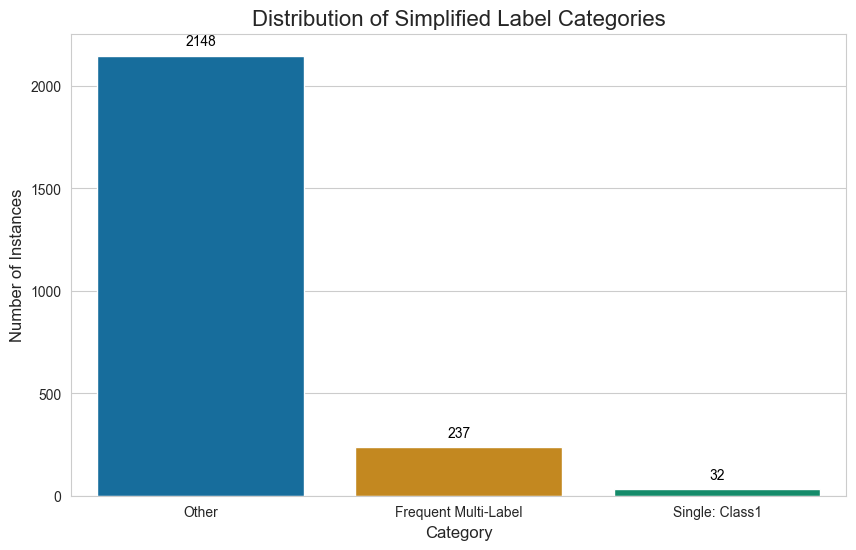

In [66]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(
    x=color_labels, 
    order=color_labels.value_counts().index, 
    palette='colorblind')

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', 
                fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add titles and labels
plt.title('Distribution of Simplified Label Categories', fontsize=16)
plt.ylabel('Number of Instances', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.show()

### **Scaling**

#### **Approach**
* **Problem:** Distance-based algorithms like t-SNE are highly sensitive to the numerical range of features. A feature with a large scale (e.g., 0-1000) will disproportionately dominate the distance calculation over a feature with a small scale (e.g., 0-1).
* **Method:** We apply **Standardization** using `StandardScaler` from scikit-learn.
* **Action:** This process rescales every feature to have a mean of 0 and a standard deviation of 1, putting all features on a common, comparable scale.

#### **Results**
* **Bias Removal:** Standardization removes the bias from features with arbitrarily large ranges.
* **Equal Contribution:** It ensures every feature contributes equally to the distance metric, allowing the algorithm to identify the true underlying patterns in the data.
* **Prerequisite for Analysis:** This step is crucial for an accurate and meaningful dimensionality reduction, preventing a distorted representation of the data's structure.

In [ ]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

Original X shape: (2417, 103)
X_scaled shape: (2417, 103)

Mean of first column after scaling: 0.0000
Standard Deviation of first column after scaling: 1.0000


In [63]:
print("Original X shape:", X.shape)
print("X_scaled shape:", X_scaled.shape)

Original X shape: (2417, 103)
X_scaled shape: (2417, 103)


In [64]:
print(f"\nMean of first column after scaling: {X_scaled[:, 0].mean():.4f}")
print(f"Standard Deviation of first column after scaling: {X_scaled[:, 0].std():.4f}")


Mean of first column after scaling: 0.0000
Standard Deviation of first column after scaling: 1.0000


## **Part B: t-SNE and Veracity Inspection**

### **t-SNE Implementation**

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a powerful non-linear technique for visualizing high-dimensional data. It's especially good at revealing the underlying cluster structure. The most critical hyperparameter is **`perplexity`**, which roughly defines the number of neighbors each point considers. Experimenting with it is key to getting a meaningful visualization.

  * **Low Perplexity (e.g., 5):** Focuses on very local structure, often resulting in noisy, fragmented plots where larger clusters are torn apart.
  * **High Perplexity (e.g., 50):** Considers a wider neighborhood, revealing broader structures but potentially merging smaller, distinct groups.
  * **Good Perplexity (often 5-50):** The goal is to find a value that produces stable, interpretable clusters.

The code below runs t-SNE for perplexities 5, 30, and 50 and plots them for comparison.

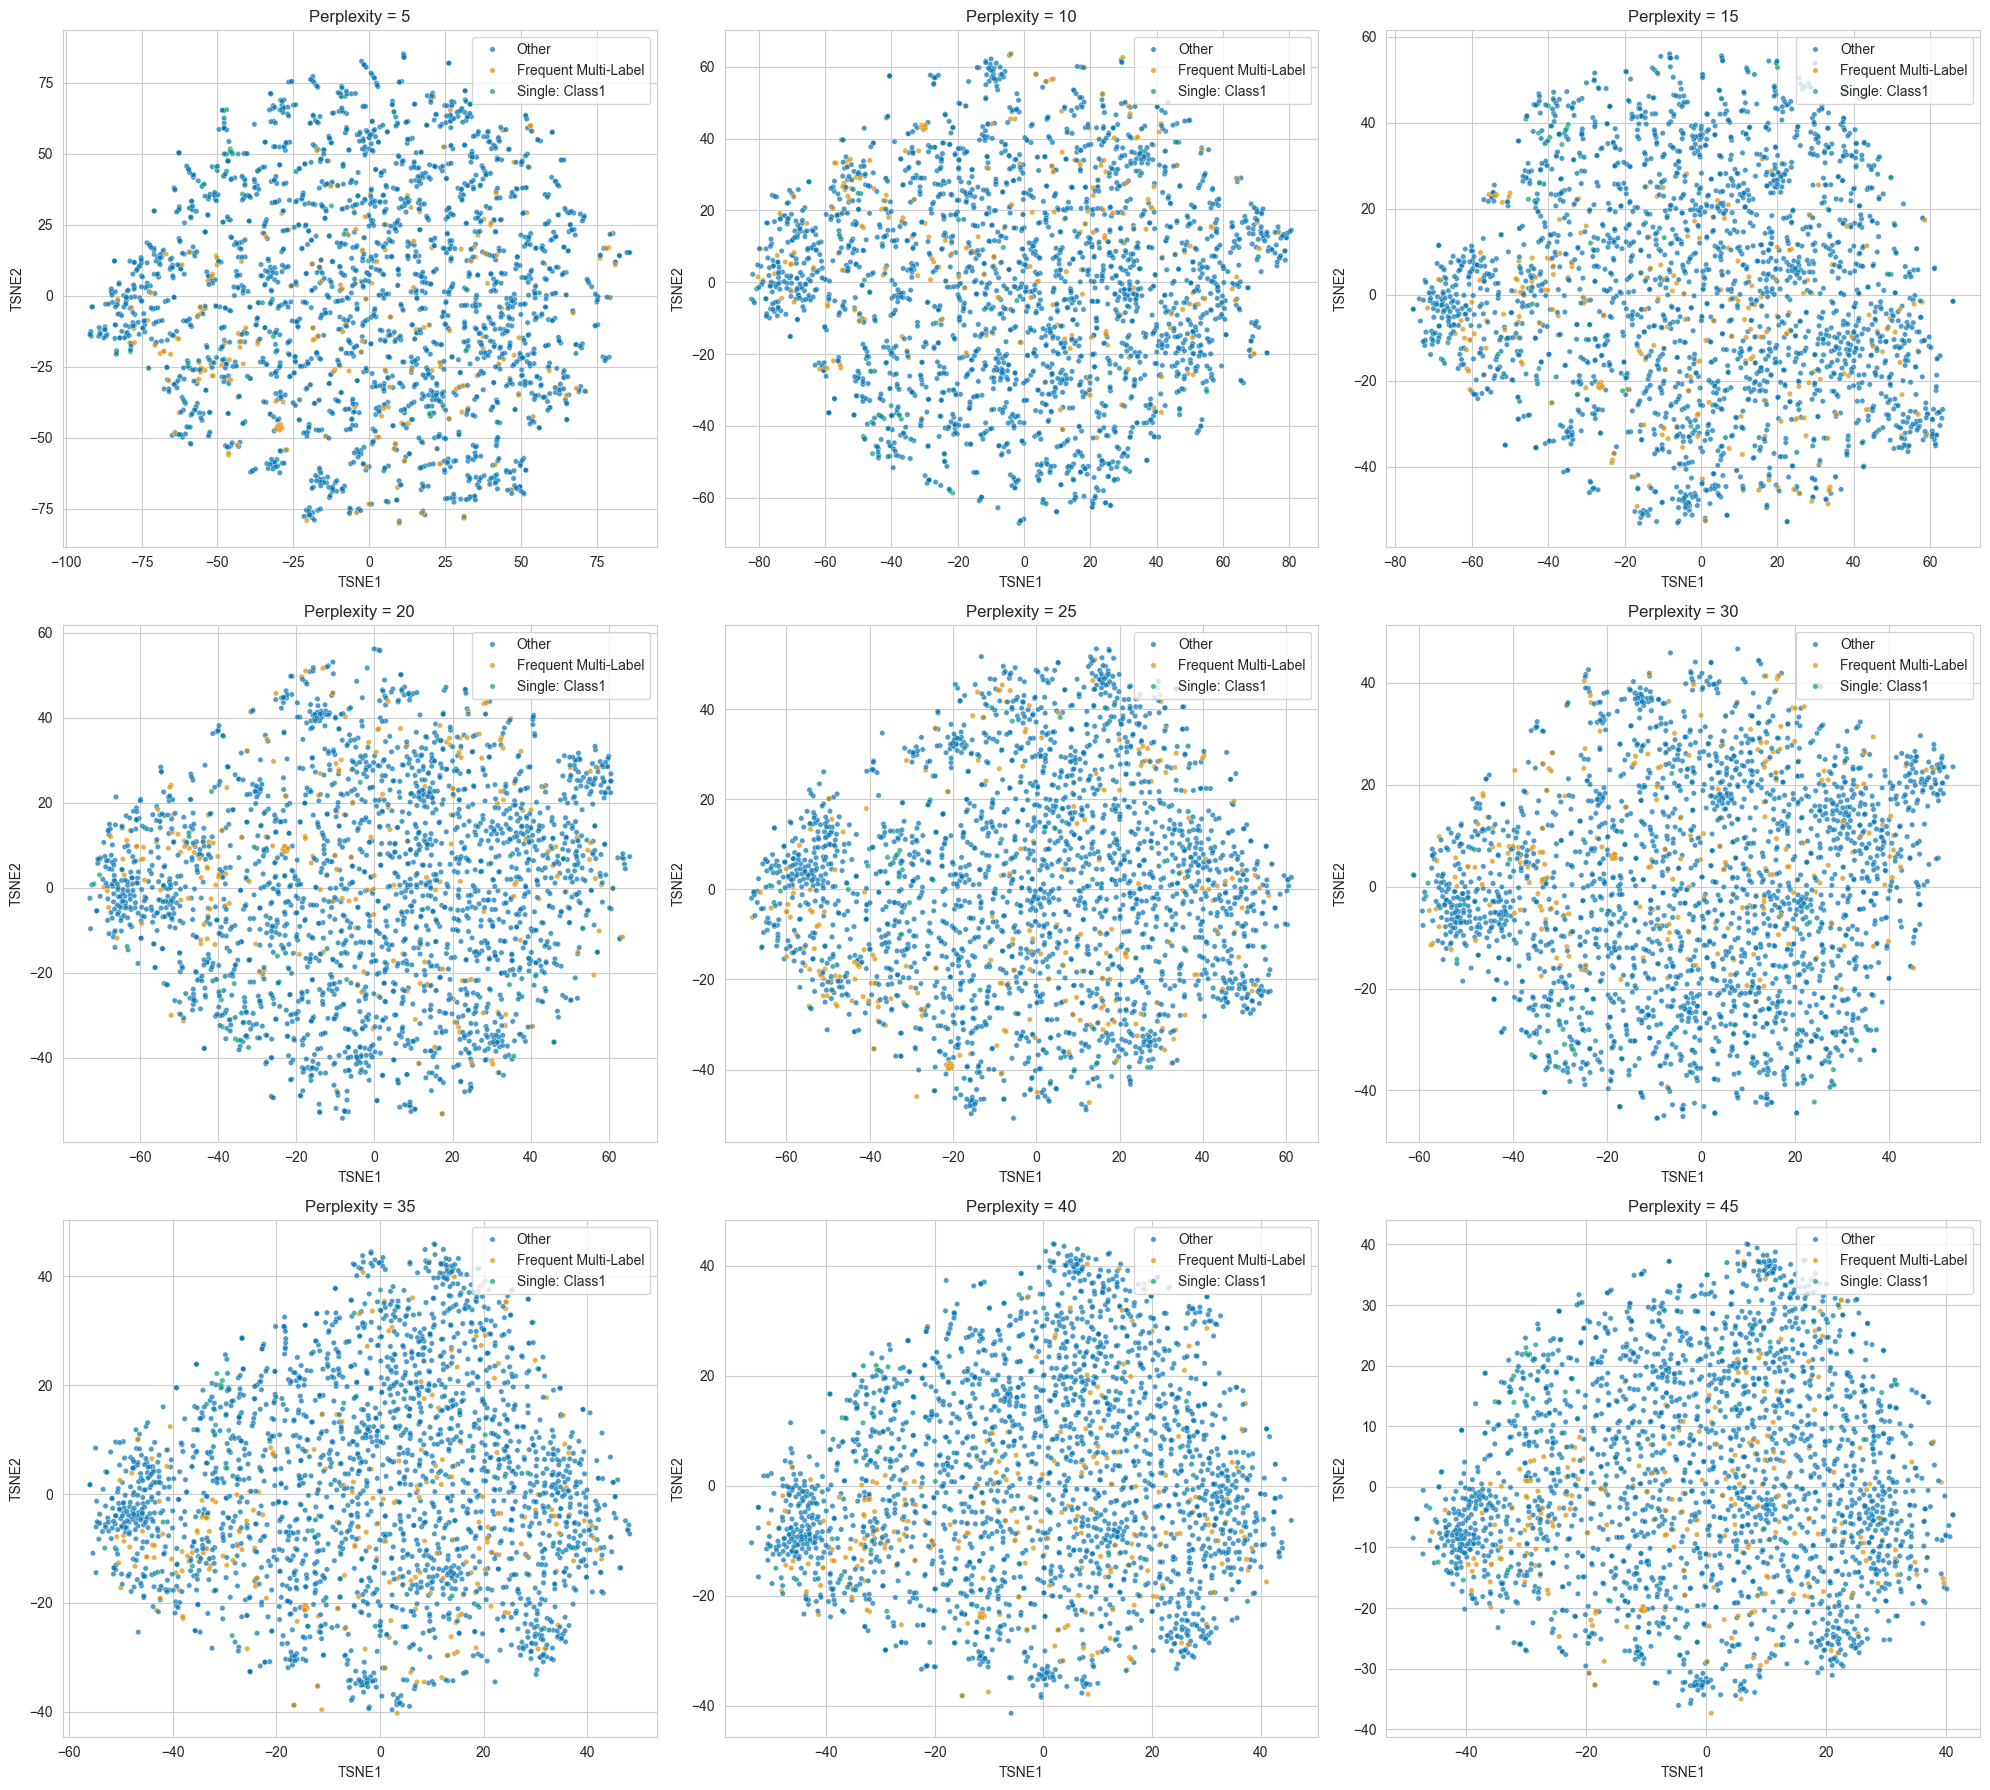

In [85]:
perplexities = [i for i in range(5, 50, 5)]

n_cols = 3
n_rows = len(perplexities) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()

for i, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=2, 
                perplexity=perplexity, 
                random_state=42, 
                n_iter_without_progress=1000,
                init='pca', 
                learning_rate='auto')
    X_tsne = tsne.fit_transform(X_scaled)

    tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])
    tsne_df['label'] = color_labels

    ax = axes[i]
    sns.scatterplot(
        x='TSNE1', y='TSNE2',
        hue='label',
        palette='colorblind',
        data=tsne_df,
        ax=ax,
        s=15,
        alpha=0.7
    )
    ax.set_title(f'Perplexity = {perplexity}')
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

### **Visualization**
#### **Justification for Final Choice of Perplexity**

After experimenting with a range of perplexity values from 5 to 50, it is evident that **no value produces a clean, well-defined separation** of the highlighted functional categories. The `Frequent Multi-Label` and `Single: Class1` groups remain heavily intermingled with the `Other` category across all plots. This lack of separation is a significant finding in itself, suggesting the data's classes are inherently overlapping.

Despite this, a choice must be made for a final visualization.

* **Low perplexities (5-15)** result in noisy and fragmented plots that are difficult to interpret.
* **High perplexities (40-50)** create overly dense, simplified clouds that may hide subtle structural details.

Therefore, **a perplexity of 30 is selected**. While it does not achieve ideal cluster separation, it offers the best **balance**. It avoids the noise of low perplexities and the over-simplification of high perplexities. It represents a point where the global structure of the data has stabilized, providing the most honest and balanced visualization of the dataset's complex, overlapping nature for the subsequent veracity inspection.

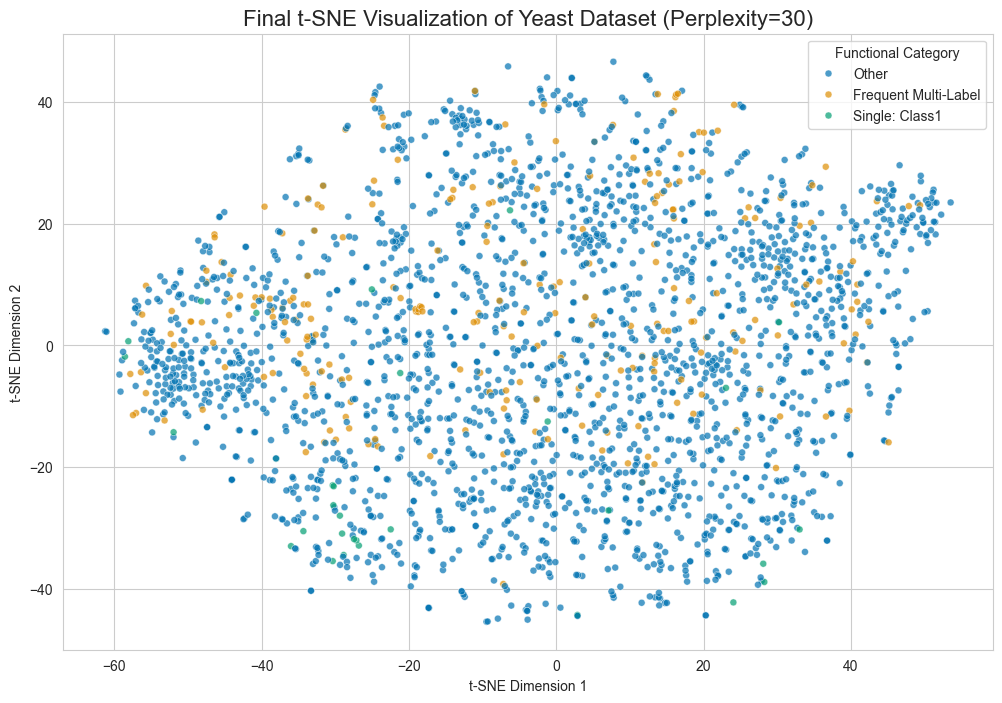

In [ ]:
final_perplexity = 30

tsne_final = TSNE(n_components=2,
                  perplexity=final_perplexity,
                  random_state=42,
                  n_iter_without_progress=1000,
                  init='pca',
                  learning_rate='auto')

X_tsne_final = tsne_final.fit_transform(X_scaled)

tsne_final_df = pd.DataFrame(data=X_tsne_final, columns=['t-SNE Dimension 1', 't-SNE Dimension 2'])
tsne_final_df['Category'] = color_labels

plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.scatterplot(
    x='t-SNE Dimension 1',
    y='t-SNE Dimension 2',
    hue='Category',
    palette='colorblind',
    data=tsne_final_df,
    s=25,
    alpha=0.7
)

ax.set_title(f'Final t-SNE Visualization of Yeast Dataset (Perplexity={final_perplexity})', fontsize=16)
plt.legend(title='Functional Category', loc='upper right')
plt.show()

### **Veracity Inspection**

The final t-SNE visualization, while not revealing cleanly separated clusters, is profoundly insightful for assessing data veracity. The analysis below is based on the key observation that the functional categories are highly intermingled.

#### **Hard-to-Learn Samples**
The most significant finding is that the **entire t-SNE plot represents a hard-to-learn region**. Unlike datasets with clear cluster structures, here the `Frequent Multi-Label`, `Single: Class1`, and `Other` categories are thoroughly mixed into a single, large cloud. This demonstrates a severe class overlap, meaning the gene expression profiles for different functions are not distinct. A simple classifier would likely fail on this data because there are no clear decision boundaries to learn; the data is inherently complex and intertwined.

#### **Noisy/Ambiguous Labels**
Given the pervasive mixing, the concept of a "misplaced" point is less meaningful. Instead, the plot suggests that a large number of labels in the dataset may be **inherently ambiguous**. The fact that `Frequent Multi-Label` and `Single: Class1` points are scattered throughout the main cloud indicates their biological functions are not unique. They share many characteristics with the diverse gene groups in the `Other` category, suggesting their labels, while technically correct, may not represent a functionally distinct group.

#### **Outliers**
While the vast majority of the data forms one dense, mixed cloud, a few isolated points can still be identified on the extreme periphery. These outliers are significant because they have managed to separate themselves from the otherwise inseparable mass.
* **Hypothesis 1 (Error):** These points could represent **experimental errors** or significant noise, causing their expression profiles to be drastically different.
* **Hypothesis 2 (Biology):** Alternatively, these could be the most interesting samples in the dataset, representing genuinely **rare or unique biological states** that are distinct even from the highly overlapping majority.

## **Part C: Isomap and Manifold Learning**

### **Isomap Implementation**

**Isomap (Isometric Mapping)** is a non-linear dimensionality reduction technique that belongs to a family of methods known as manifold learning. It excels at trying to "unfold" complex data to reveal its underlying geometric structure.

#### **Fundamental Difference: Global vs. Local Preservation**

The most fundamental difference between Isomap and t-SNE is what aspect of the data's structure they try to preserve.

  * **t-SNE (Local Focus):** Think of t-SNE as a powerful magnifying glass for **local neighborhoods**. Its primary goal is to ensure that points that are close neighbors in the high-dimensional space remain close neighbors on the 2D map. It is excellent at visualizing clusters but will often distort the global distances between those clusters to achieve this.

  * **Isomap (Global Focus):** Think of Isomap as trying to **unroll a crumpled piece of paper**. Its goal is to preserve the **global geodesic distances** between all points. Geodesic distance is the shortest path between two points *along the surface of the manifold*, not a straight line through empty space. This makes Isomap better at revealing the overall shape and structure of the entire dataset.

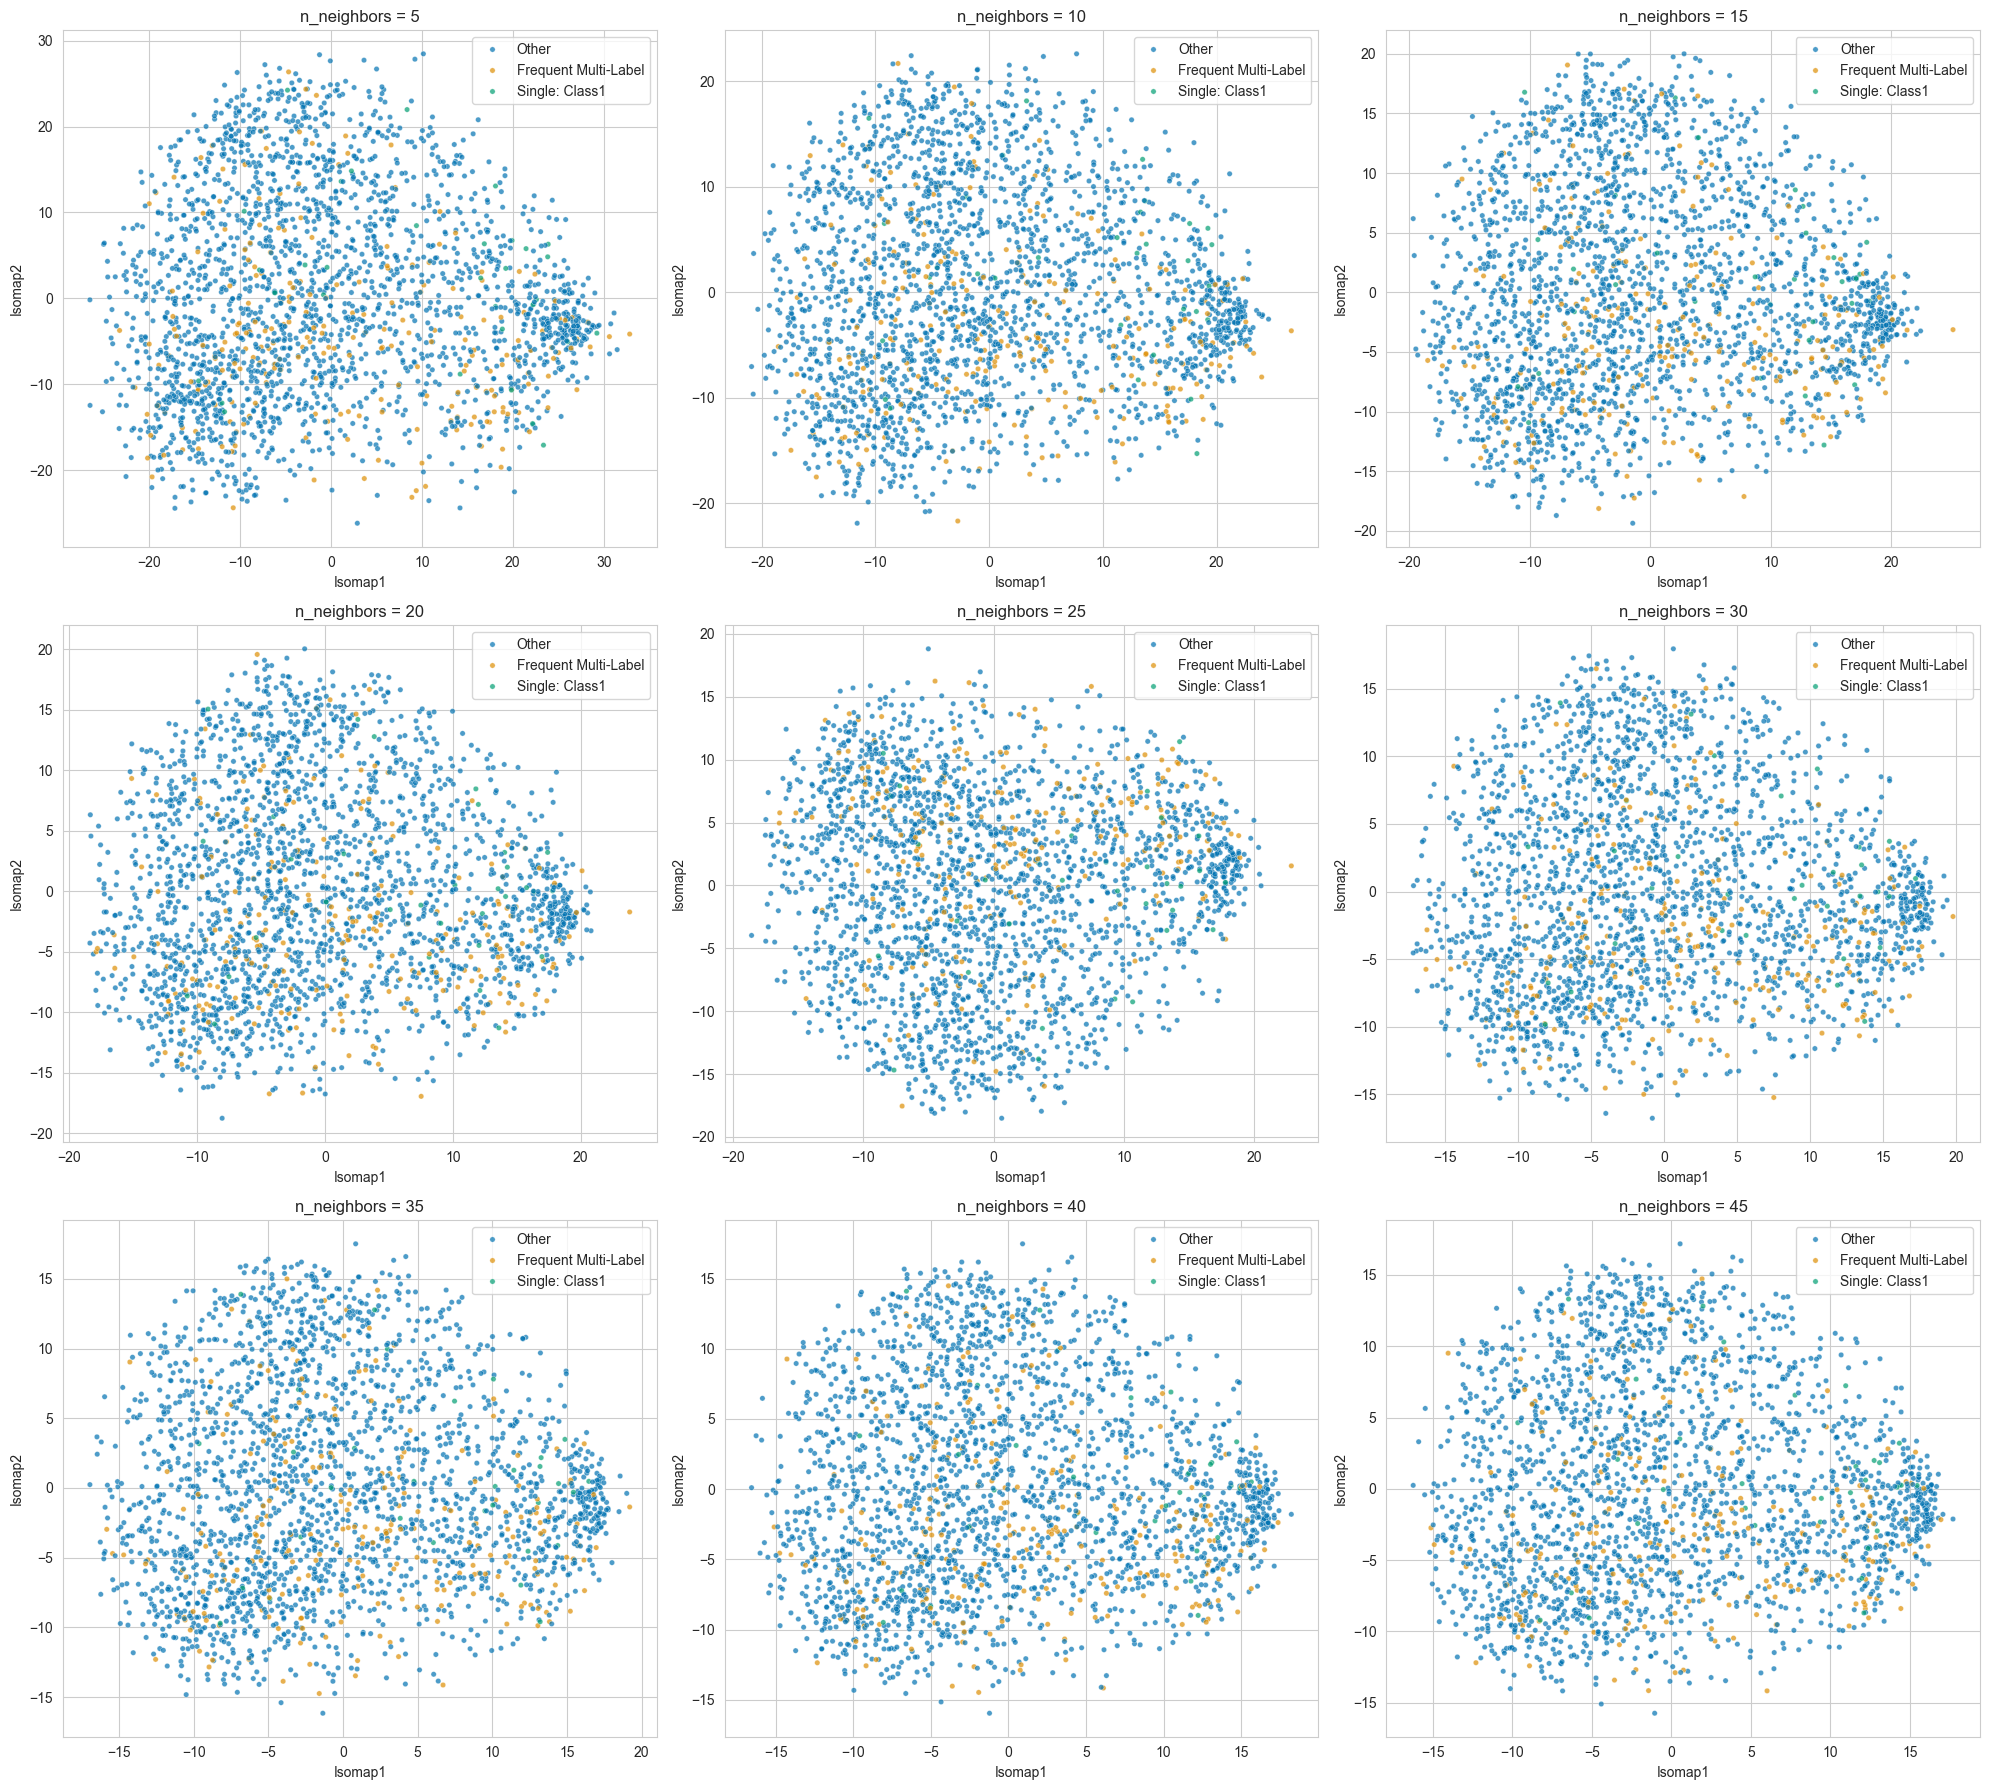

In [97]:
n_neighbors_list = [i for i in range(5, 50, 5)]

n_cols = 3
n_rows = (len(n_neighbors_list) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 6 * n_rows))
axes = axes.flatten()

for i, k in enumerate(n_neighbors_list):

    isomap = Isomap(n_components=2, 
                    n_neighbors=k)
    
    X_isomap = isomap.fit_transform(X_scaled)

    isomap_df = pd.DataFrame(data=X_isomap, columns=['Isomap1', 'Isomap2'])
    isomap_df['Category'] = color_labels

    ax = axes[i]
    sns.scatterplot(
        x='Isomap1', y='Isomap2',
        hue='Category',
        palette='colorblind',
        data=isomap_df,
        ax=ax,
        s=15,
        alpha=0.7
    )
    ax.set_title(f'n_neighbors = {k}')
    ax.legend(loc='upper right')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### **Visualization**

#### **Justification for Final Choice of `n_neighbors`**

To select an appropriate value for the `n_neighbors` hyperparameter, we experimented with a range of values from 5 to 45. The resulting grid of plots shows how the visualization of the data manifold changes with the size of the local neighborhood considered.

* At **low `n_neighbors` values (5-10)**, the plot is more sensitive to local noise and doesn't fully capture the continuous, global structure of the data.
* At **high `n_neighbors` values (35-45)**, the visualization becomes more condensed and may be over-smoothing the manifold, potentially hiding important geometric features.
* A **stable structure** emerges in the middle range, particularly from `n_neighbors = 15` to `30`, where the overall shape of the manifold is consistent.

We have chosen **`n_neighbors=20`** for the final visualization. This value sits comfortably within the stable range and provides the best balance between preserving the local geometry and capturing the global structure of the data manifold, ensuring the most reliable representation for our analysis.

In [ ]:
# --- 1. Run Isomap with the final chosen n_neighbors ---
final_n_neighbors = 20

isomap_final = Isomap(n_components=2, n_neighbors=final_n_neighbors)
X_isomap_final = isomap_final.fit_transform(X_scaled)

# --- 2. Create a DataFrame for plotting ---
isomap_final_df = pd.DataFrame(data=X_isomap_final, columns=['Isomap Dimension 1', 'Isomap Dimension 2'])
isomap_final_df['Category'] = color_labels

# --- 3. Create the final, polished scatter plot ---
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

ax = sns.scatterplot(
    x='Isomap Dimension 1',
    y='Isomap Dimension 2',
    hue='Category',
    palette='viridis',
    data=isomap_final_df,
    s=25,
    alpha=0.7
)

ax.set_title(f'Final Isomap Visualization of Yeast Dataset (n_neighbors={final_n_neighbors})', fontsize=16)
plt.legend(title='Functional Category')
plt.show()

### **Comparison and Curvature**
#### **Comparison with t-SNE**

The primary finding is that, similar to t-SNE, **Isomap fails to produce any clean separation** of the functional categories, confirming the data's inherent class overlap. However, the two methods reveal different aspects of the data's structure.

* **t-SNE:** By focusing on preserving **local neighborhoods**, it creates a dense, roughly circular cloud. This excels at showing which points are immediate neighbors but distorts the global geometry.
* **Isomap:** By focusing on preserving **global geodesic distances**, it produces a more elongated and structured shape. This represents a better approximation of the overall data landscape or "manifold."

**Conclusion:** While neither separates the classes, **Isomap is superior for revealing the global structure** of the gene expression data, giving a more faithful "unfolded" view of the entire dataset.

#### **Data Manifold and Classification Difficulty**

A **data manifold** is the underlying lower-dimensional surface on which the high-dimensional data points actually lie. The Isomap plot is a 2D approximation of this surface.

The Isomap visualization reveals an elongated, non-uniform shape, not a simple sphere. This is direct visual evidence that the data manifold is **complex and curved**. This curvature is the geometric reason classification is so difficult for this dataset. Because the classes follow this winding path through the feature space, they cannot be separated by simple linear boundaries (like a flat plane). A successful classifier must be powerful enough to learn a highly **non-linear decision boundary** that can conform to the manifold's intricate shape.

## **Conclusion and Final Findings**

Our investigation of the Yeast dataset using t-SNE and Isomap led to a crucial insight: the functional gene categories are **not well-separated** and exhibit severe **class overlap**. Rather than being a failure of the visualization methods, this was the primary finding. We successfully visualized the characteristics of a **hard-to-learn** classification problem.

**Key Learnings:**
* **Visualization Exposes Complexity:** Both t-SNE and Isomap transformed an abstract classification challenge into a tangible visual problem. The dense, intermingled clouds immediately showed why a simple model would fail.
* **Isomap Reveals Global Structure:** While t-SNE confirmed the local mixing of classes, Isomap provided a more global perspective. Its output suggested the data lies on a **complex and curved manifold**, offering a geometric explanation for the high classification difficulty.
* **Data Veracity Beyond Cleanliness:** We learned that data veracity issues are not limited to simple outliers or mislabels. The most significant challenge in this dataset is the inherent ambiguity and overlap between classes, a problem clearly exposed by these advanced visualization tools.

In conclusion, this analysis provided a powerful visual narrative, shifting the focus from a search for clean clusters to a deeper understanding of the data's complex and challenging nature.